# Övning: Ice cream selling data

* Kör cellen nedan för att ladda in datan.
* Dela upp datan i träning- och testset.
* Gör en EDA.
* Använd valfria *preprocessing*-steg och träna en valfri regressionsmodell på datan. Se hur låg RMSE du kan nå!

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor


In [ ]:


#def load_icecream_sales():
    #df = pd.read_csv(r'C:\Users\46733\pyhtongithub\kurs_pystat\ds24_ml\ice_cream_selling_data.csv')
    #X = df.iloc[:, 0]
    #y = df.iloc[:, 1]
    #return X, y

#X, y = load_icecream_sales()

In [ ]:
def load_icecream_sales():
    df = pd.read_csv(r'C:\Users\46733\pyhtongithub\kurs_pystat\ds24_ml\ice_cream_selling_data.csv')

    
    X = df.iloc[:, :-1]  
    y = df.iloc[:, -1]   
    
    return X, y

X, y = load_icecream_sales()

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")

Training data: (39, 1), Test data: (10, 1)


In [ ]:
print(X.isnull().sum())  


Temperature (°C)    0
dtype: int64


In [ ]:
print(X.columns) 

Index(['Temperature (°C)'], dtype='object')


In [ ]:
print(type(X))  


<class 'pandas.core.frame.DataFrame'>


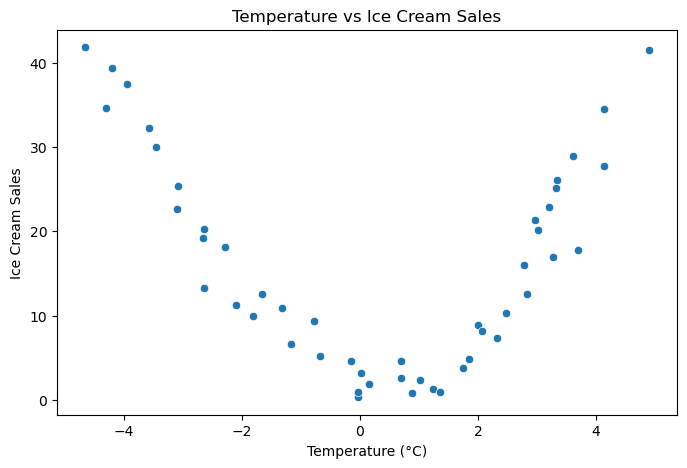

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['Temperature (°C)'], y=y)  
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales")
plt.title("Temperature vs Ice Cream Sales")
plt.show()

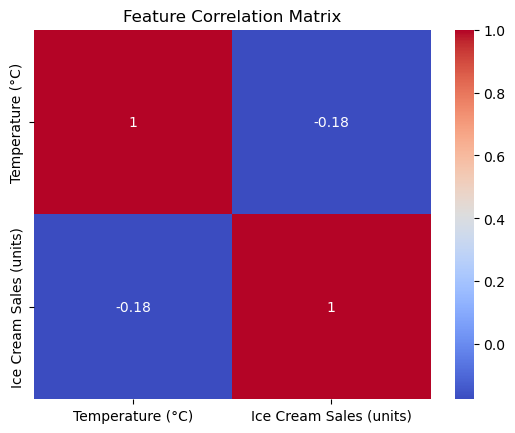

In [26]:
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE (Linear Regression): {rmse}")

RMSE (Linear Regression): 12.219913714640208


c:\Users\46733\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
print(f"RMSE (Polynomial Regression): {rmse_poly}")

RMSE (Polynomial Regression): 3.8573042971719858


c:\Users\46733\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"RMSE (Random Forest): {rmse_rf}")

RMSE (Random Forest): 4.266335583796928


c:\Users\46733\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
